In [1]:
# https://www.kaggle.com/danilzyryanov/crime-in-berlin-2012-2019/version/4 : Berlin_crimes.csv
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
berlin_crimes_df = pd.read_csv("Berlin_crimes.csv")

In [3]:
berlin_crimes_df.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [4]:
berlin_crimes_df['full_location'] = berlin_crimes_df.apply(lambda row: row.Location + ", Berlin", axis=1)

In [5]:
berlin_crimes_df.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,full_location
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,"Tiergarten Süd, Berlin"
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,"Regierungsviertel, Berlin"
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,"Alexanderplatz, Berlin"
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,"Brunnenstraße Süd, Berlin"
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,"Moabit West, Berlin"


In [6]:
berlin_crimes_SMALL_df= berlin_crimes_df.head(5)
berlin_crimes_SMALL_df.head(10)

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,full_location
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,"Tiergarten Süd, Berlin"
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,"Regierungsviertel, Berlin"
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,"Alexanderplatz, Berlin"
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,"Brunnenstraße Süd, Berlin"
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,"Moabit West, Berlin"


In [7]:
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="berlin_explorer")

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
berlin_crimes_SMALL_df['geocode'] = berlin_crimes_SMALL_df['full_location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
berlin_crimes_SMALL_df['point'] = berlin_crimes_SMALL_df['geocode'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
berlin_crimes_SMALL_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(berlin_crimes_SMALL_df['point'].tolist(), index=berlin_crimes_SMALL_df.index)

/Users/javier.inocente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/javier.inocente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/javier.inocente/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [8]:
berlin_crimes_SMALL_df.head(10)

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,full_location,geocode,point,latitude,longitude,altitude
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,"Tiergarten Süd, Berlin","(Bibliothek Tiergarten-Süd, 27, Lützowstraße, ...","(52.5037597, 13.3634291, 0.0)",52.503760,13.363429,0.0
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,"Regierungsviertel, Berlin","(Versorgungstunnel Regierungsviertel, Tiergart...","(52.5194841, 13.3764685, 0.0)",52.519484,13.376468,0.0
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,"Alexanderplatz, Berlin","(Alexanderplatz, Alexanderstraße, Luisenstadt,...","(52.52197645, 13.413637435864272, 0.0)",52.521976,13.413637,0.0
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,"Brunnenstraße Süd, Berlin",None,None,NaN,NaN,NaN
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,"Moabit West, Berlin","(Moabit, Mitte, Berlin, Deutschland, (52.53010...","(52.5301017, 13.3425422, 0.0)",52.530102,13.342542,0.0


In [9]:
berlin_crimes_SMALL_df.dropna().head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,full_location,geocode,point,latitude,longitude,altitude
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,"Tiergarten Süd, Berlin","(Bibliothek Tiergarten-Süd, 27, Lützowstraße, ...","(52.5037597, 13.3634291, 0.0)",52.503760,13.363429,0.0
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,"Regierungsviertel, Berlin","(Versorgungstunnel Regierungsviertel, Tiergart...","(52.5194841, 13.3764685, 0.0)",52.519484,13.376468,0.0
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,"Alexanderplatz, Berlin","(Alexanderplatz, Alexanderstraße, Luisenstadt,...","(52.52197645, 13.413637435864272, 0.0)",52.521976,13.413637,0.0
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,"Moabit West, Berlin","(Moabit, Mitte, Berlin, Deutschland, (52.53010...","(52.5301017, 13.3425422, 0.0)",52.530102,13.342542,0.0


In [10]:
berlin_onehot = pd.get_dummies(berlin_crimes_df[['District']], prefix="", prefix_sep="")

In [11]:
berlin_onehot.shape

(1200, 12)

In [12]:
pd1 = pd.merge(berlin_crimes_df, berlin_onehot, left_index=True, right_index=True)

In [13]:
pd1.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,full_location,Charlottenburg-Wilmersdorf,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn-Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Treptow-Köpenick
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,"Tiergarten Süd, Berlin",0,0,0,0,1,0,0,0,0,0,0,0
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,"Regierungsviertel, Berlin",0,0,0,0,1,0,0,0,0,0,0,0
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,"Alexanderplatz, Berlin",0,0,0,0,1,0,0,0,0,0,0,0
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,"Brunnenstraße Süd, Berlin",0,0,0,0,1,0,0,0,0,0,0,0
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,"Moabit West, Berlin",0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
berlin_crime_for_cluster = pd1.drop(['Year','District', 'Code','Location','full_location'], axis = 1) 

In [15]:
berlin_crime_for_cluster.head()

,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Charlottenburg-Wilmersdorf,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn-Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Treptow-Köpenick
0,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,0,0,0,0,1,0,0,0,0,0,0,0
1,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,0,0,0,0,1,0,0,0,0,0,0,0
2,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,0,0,0,0,1,0,0,0,0,0,0,0
3,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,0,0,0,0,1,0,0,0,0,0,0,0
4,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
X = berlin_crime_for_cluster.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.96463342,  1.22985022,  1.27122595, ..., -0.25264558,
        -0.23735633, -0.40347329],
       [ 0.82978252,  0.46276842,  0.8114487 , ..., -0.25264558,
        -0.23735633, -0.40347329],
       [ 5.60350428,  5.2908715 ,  5.19164806, ..., -0.25264558,
        -0.23735633, -0.40347329],
       ...,
       [-0.76145807, -0.66529305, -0.78956138, ..., -0.25264558,
        -0.23735633, -0.40347329],
       [-0.70751771, -0.66529305, -0.74440469, ..., -0.25264558,
        -0.23735633, -0.40347329],
       [-0.8423686 , -0.75553797, -1.07692217, ..., -0.25264558,
        -0.23735633, -0.40347329]])

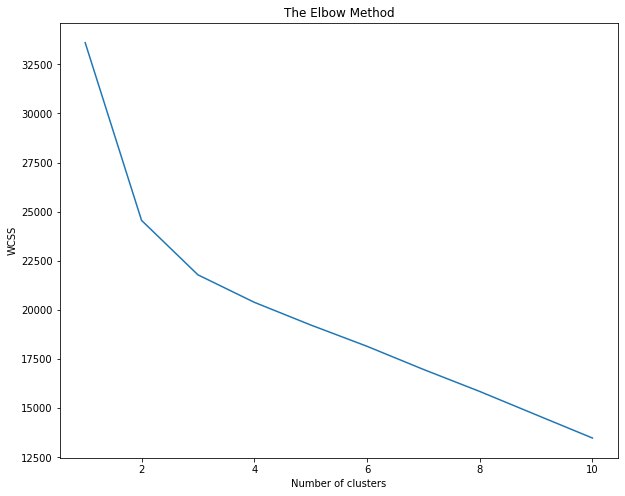

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans_best_fit = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_best_fit.fit(Clus_dataSet)
    wcss.append(kmeans_best_fit.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

In [21]:
#del berlin_crimes_df['Cluster Labels']
berlin_crimes_df.insert(0, 'Cluster Labels', kmeans.labels_)

# Labels
## [0] : low risk
## [1] : moderate risk
## [2] : high risk

In [22]:
berlin_crimes_df.head()

,Cluster Labels,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,full_location
0,0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,"Tiergarten Süd, Berlin"
1,0,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,"Regierungsviertel, Berlin"
2,2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,"Alexanderplatz, Berlin"
3,0,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,"Brunnenstraße Süd, Berlin"
4,2,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,"Moabit West, Berlin"


In [23]:
berlin_crimes_df.loc[berlin_crimes_df['Cluster Labels'] == 2, berlin_crimes_df.columns[[1] + list(range(2, berlin_crimes_df.shape[1]-1))]]
berlin_crimes_df.groupby('District').mean()

,Cluster Labels,Year,Code,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
District,,,,,,,,,,,,,,,,,,,
Charlottenburg-Wilmersdorf,0.611111,2015.5,40886.277778,29.305556,14.159722,221.743056,54.145833,79.027778,1458.562500,40.423611,225.527778,183.659722,73.652778,9.118056,4.118056,203.673611,44.194444,58.506944,561.416667
Friedrichshain-Kreuzberg,1.430556,2015.5,21404.000000,93.722222,59.861111,523.875000,169.722222,128.388889,2963.722222,50.930556,312.305556,450.861111,91.736111,28.777778,10.291667,556.791667,140.388889,440.041667,1231.166667
Lichtenberg,0.723214,2015.5,110985.071429,16.875000,9.437500,187.508929,40.401786,57.419643,887.517857,46.883929,151.812500,123.821429,39.687500,12.848214,5.107143,201.276786,45.053571,31.517857,435.553571
Marzahn-Hellersdorf,0.637500,2015.5,101194.500000,24.762500,13.625000,302.475000,57.200000,91.625000,950.512500,56.250000,173.262500,103.687500,46.687500,20.637500,6.650000,284.225000,58.925000,38.575000,608.637500
Mitte,1.306818,2015.5,11121.727273,86.159091,48.011364,677.590909,178.750000,194.659091,3732.386364,47.568182,393.920455,381.522727,112.670455,26.954545,10.227273,516.556818,124.795455,300.511364,1436.443182
Neukölln,0.920455,2015.5,81086.818182,52.943182,28.920455,366.352273,105.238636,130.420455,1836.613636,46.397727,288.954545,176.909091,100.693182,21.625000,9.704545,374.715909,60.465909,139.238636,940.193182
Pankow,0.529412,2015.5,31008.000000,18.977941,9.588235,169.536765,39.772059,60.036765,1234.757353,42.147059,161.860294,254.889706,58.169118,12.161765,4.860294,246.220588,71.330882,35.529412,514.411765
Reinickendorf,0.500000,2015.5,122920.333333,24.843750,12.197917,234.520833,55.552083,95.177083,1031.385417,28.687500,189.604167,102.875000,70.666667,14.104167,5.375000,217.697917,41.895833,76.041667,545.052083
Spandau,0.750000,2015.5,51184.500000,28.925000,14.912500,283.375000,66.475000,104.725000,1122.650000,32.375000,164.325000,106.937500,54.950000,16.850000,6.800000,250.050000,34.950000,52.037500,654.437500


In [24]:
berlin_crimes_df.groupby('Cluster Labels').mean()

,Year,Code,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
Cluster Labels,,,,,,,,,,,,,,,,,,
0,2015.493213,63635.411765,36.187783,18.968326,317.90724,73.013575,113.294118,1779.373303,59.291855,274.828054,244.714932,90.305430,19.563348,7.506787,347.339367,74.106335,73.131222,799.798643
1,2015.532773,78116.638655,12.559664,6.996639,119.22521,26.137815,44.714286,642.149580,25.749580,111.818487,93.284034,35.986555,8.189916,3.420168,137.680672,32.650420,26.858824,285.220168
2,2015.398773,35712.220859,108.049080,61.018405,737.09816,212.736196,211.159509,3817.220859,58.153374,431.435583,451.411043,135.337423,34.779141,13.404908,628.558282,142.815951,424.085890,1666.760736


In [25]:
X[:, 14]

array([171,  98, 435, ...,  21,  31,   9])

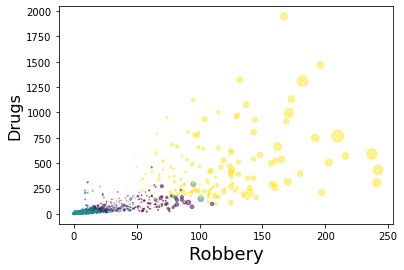

In [26]:
import matplotlib.pyplot as plt 
area = np.pi * ( Clus_dataSet[:, 1])**2  
plt.scatter(X[:, 0], X[:, 14], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Robbery', fontsize=18)
plt.ylabel('Drugs', fontsize=16)

plt.show()

In [27]:
X[:, 1]

array([ 46,  29, 136, ...,   4,   4,   2])

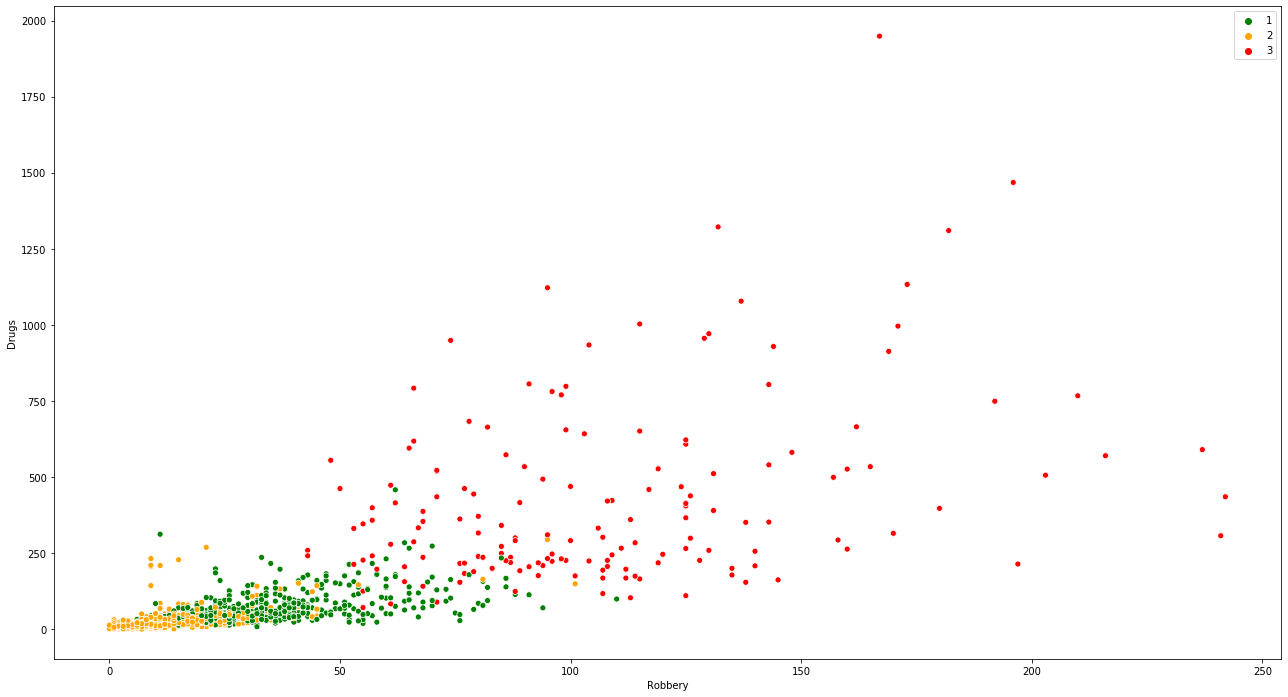

In [28]:
import seaborn as sns
YY = kmeans.labels_+1
plt.figure(figsize=(22,12))
sns.scatterplot(x=berlin_crimes_df['Robbery'], y = berlin_crimes_df['Drugs'],hue=YY, palette=['green','orange','red'])